有一批指示灯，放在正方形的测试仪器 board 中进行测试。 board[i][j] 表示仪器第 i 行 j 列位置上指示灯的型号。

现进行测试，仪器依次接收 nums 中的数字，规则如下：

l  每接收一个数字， board 中所有型号值等于该数字的指示灯都会点亮；

l  当 board 有任意一行或一列被完全点亮时，表示仪器测试完成；

l  有 1 次交换 board 中任意两盏指示灯的机会（也可以不使用）。

请问仪器最早能在接收第几个数字（从 1 开始计数）时完成测试？

示例 1：
- 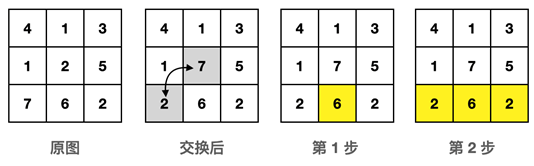
输入：
nums = [6,2,2,1,7,5,7,3,4]
board = [[4,1,3],[1,2,5],[7,6,2]]

输出: 2

解释：
如下图所示方案，交换 board 中 2和7的位置，即可在接收完 nums[1] = 2 时完整点亮 board 的最后一行。
-
假设不交换，在接收完 nums[1] 数字后，board的最后一行和中间一列只差一盏灯未点亮，因此只要交换一盏灯，即可在第 2 步完成。

示例 2：

输入：
nums = [8,9,2,7,10,1,1,1,4,5,5,3]
board = [[5,9,5,1],[1,4,2,8],[2,8,1,3],[3,1,7,2]]

输出: 6

解释：
其中一种方案如下图所示：
- 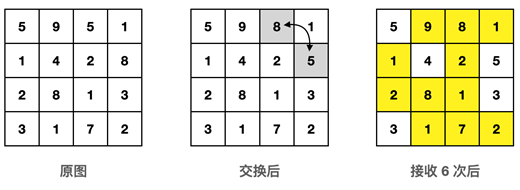

示例 3：

输入：
nums = [1,2,3,4,5,6,7,8,9]
board = [[7,1,2,8],[4,8,6,3],[9,2,1,7],[4,7,6,5]]

输出: 6

解释：不需要交换任何指示灯的位置。

提示：

l 2 <= board.length == board[i].length <= 300，board 中的数字可能重复，且每个数字的重复个数不超过 100

l 1 <= nums.length <= 10^5, 1 <= nums[i] <= 10^5，nums 中的数字可能重复

l board 中的所有数字在 nums 中都存在，nums 中的数字在 board 中不一定存在

l 温馨提醒：暴力解法通过用例不多，请考虑高效的解法

### 思路
- 需要一个快速的方法来点亮对应的灯
- 出现一列或者一行为n-1个后，我们直接从任意一处已经点亮的灯交换即可，我们并不关心这个灯在哪，怎么交换

In [82]:
from typing import List
import numpy as np


class Solution:

    def earliest_completed_test(self, nums: List[int], board: List[List[int]]) -> int:
        lens = len(board)
        board = np.array(board)
        light = np.zeros_like(board)
        for i, num in enumerate(nums):
            temp = np.array(board == num).astype(int)
            light += temp
            light = light.astype(bool).astype(int)
            row_sum = light.sum(axis=0)
            col_sum = light.sum(axis=1)
            if lens - 1 in row_sum or lens - 1 in col_sum and light.sum() >= lens:
                return i + 1
        return len(nums)

In [83]:
nums = [6,2,2,1,7,5,7,3,4]
board = [[4,1,3],[1,2,5],[7,6,2]]

In [84]:
nums = [8,9,2,7,10,1,1,1,4,5,5,3]
board = [[5,9,5,1],[1,4,2,8],[2,8,1,3],[3,1,7,2]]

In [85]:
nums = [1,2,3,4,5,6,7,8,9]
board = [[7,1,2,8],[4,8,6,3],[9,2,1,7],[4,7,6,5]]

In [86]:
sol = Solution()
sol.earliest_completed_test(nums,board)

6